In [5]:
import sys

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../src')
import const

In [3]:
train_df = pd.read_csv('../data/input/train_metadata.csv')

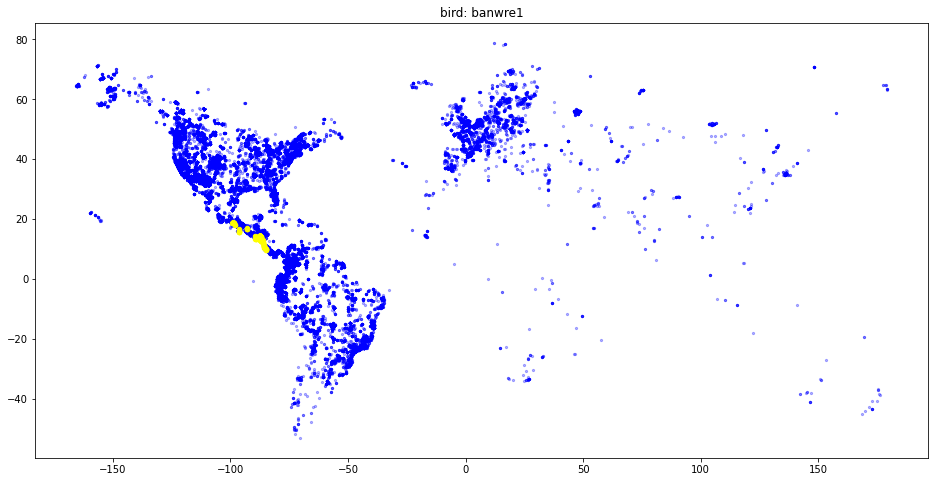

In [72]:
bird_idx = 21
bird = list(const.BIRD_CODE.keys())[bird_idx]

bird_idx = train_df[train_df["primary_label"] == bird].index.values
else_idx = train_df[train_df["primary_label"] != bird].index.values

plt.figure(figsize=(16, 8))
plt.title(f"bird: {bird}")
plt.scatter(train_df.loc[else_idx, "longitude"].values, train_df.loc[else_idx, "latitude"].values, s=5, c="blue", alpha=0.3)
plt.scatter(train_df.loc[bird_idx, "longitude"].values, train_df.loc[bird_idx, "latitude"].values, s=20, c="yellow")

In [76]:
np.random.rand() * 10

5.37380455574524